In [17]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (6.6 kB)
Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4

In [18]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:

pip install numpy==1.26.4


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:


def gamma_correction(image, c, gamma):

    I_norm = image.astype('float32') / 255.0
    
    I_gamma = c * (I_norm ** gamma)
    
    I_gamma = np.clip(I_gamma * 255, 0, 255)
    
    return I_gamma.astype(np.uint8)


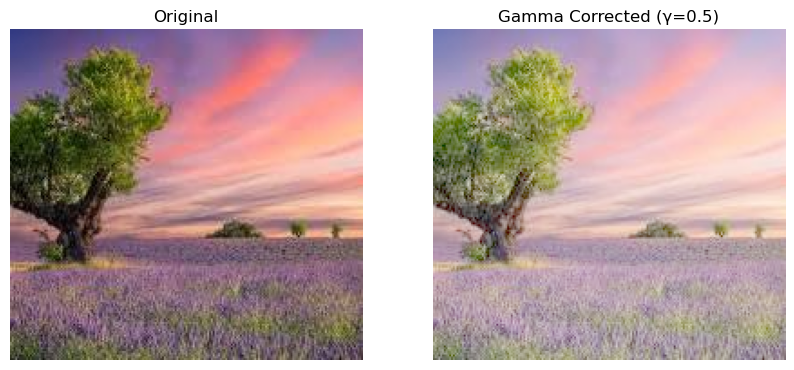

In [4]:
image = cv2.imread('asd.jpg')

gamma_value = 0.5  
c = 1

corrected = gamma_correction(image, c, gamma_value)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB))
plt.title(f'Gamma Corrected (γ={gamma_value})')
plt.axis('off')

plt.show()

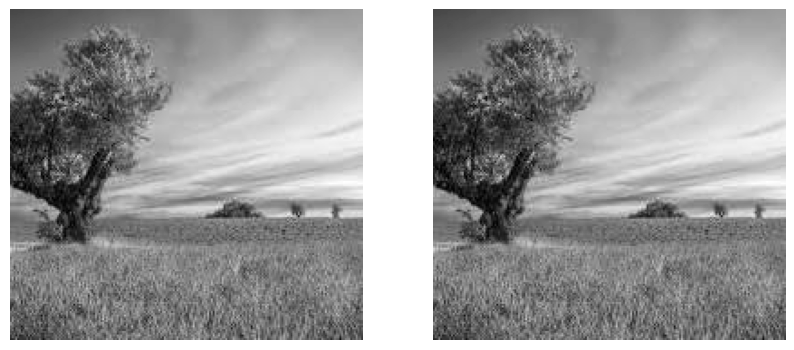

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def contrast_stretching(i_in, smax, smin):
    i_in = i_in.astype(np.float32)
    rmin = np.min(i_in)
    rmax = np.max(i_in)
    
    if rmax - rmin == 0:
        return np.zeros_like(i_in)
    
    s = ((smax - smin) / (rmax - rmin)) * (i_in - rmin) + smin
    return s

image = cv2.imread("asd.jpg", 0)

output = contrast_stretching(image, 255, 0)
output = np.clip(output, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(output, cmap='gray')
plt.axis("off")

plt.show()